This example classifies different breads
From the tutorial here: https://docs.fast.ai/tutorial.vision.html

In [1]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)
path.ls()

(#2) [Path('/u/cfonze/.fastai/data/oxford-iiit-pet/annotations'),Path('/u/cfonze/.fastai/data/oxford-iiit-pet/images')]

In [2]:
files = get_image_files(path/"images")
len(files)

7390

To label our data with the breed name, we will use a regular expression to extract it from the filename.
Since it's pretty common to use regular expressions to label the data (often, labels are hidden in the file names), there is a factory method to do just that:

In [3]:
pat = r'^(.*)_\d+.jpg'

In [4]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

we can use show_batch to have a look at our data:

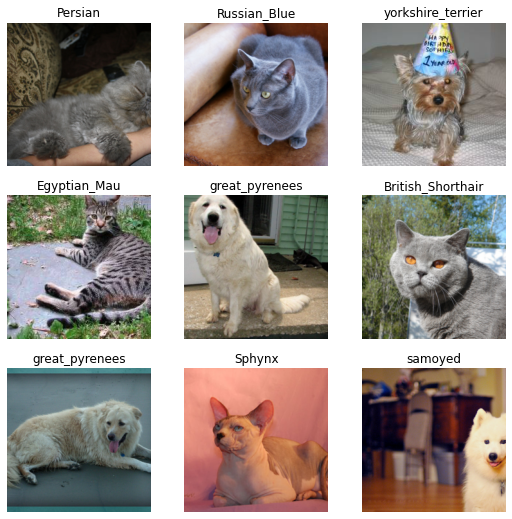

In [5]:
dls.show_batch()

Since classifying the exact breed of cats or dogs amongst 37 different breeds is a harder problem, we will slightly change the definition of our DataLoaders to use data augmentation:

In [6]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

This time we resized to a larger size before batching, and we added batch_tfms. aug_transforms is a function that provides a collection of data augmentation transforms with defaults we found that perform well on many datasets. You can customize these transforms by passing appropriate arguments to aug_transnforms.

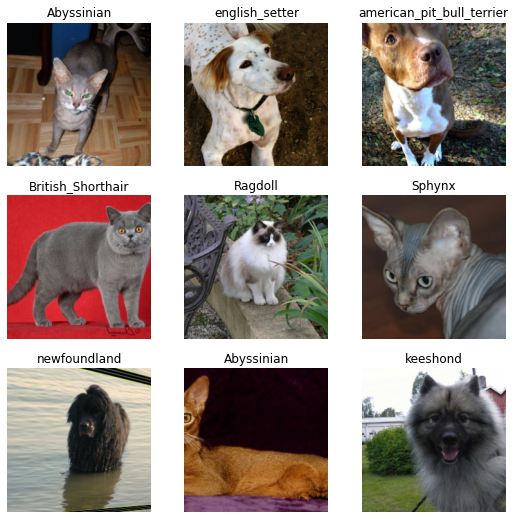

In [7]:
dls.show_batch()

We can then create our Learner exactly as before and train our model.

In [8]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

We used the default learning rate before, but we might want to find the best one possible. For this, we can use the learning rate finder:

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.002511886414140463)

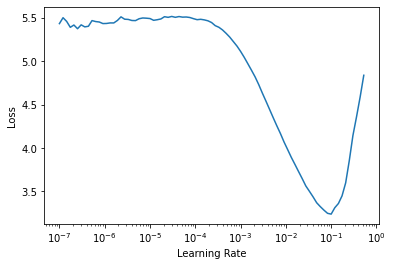

In [9]:
learn.lr_find()

It plots the graph of the learning rate finder and gives us two suggestions (minimum divided by 10 and steepest gradient). Let's use 3e-3 here. We will also do a bit more epochs:

In [10]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.319260,0.310866,0.098106,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.553019,0.387128,0.114344,00:17
1,0.334688,0.273221,0.080514,00:17


We can have a look at some predictions with show_results:

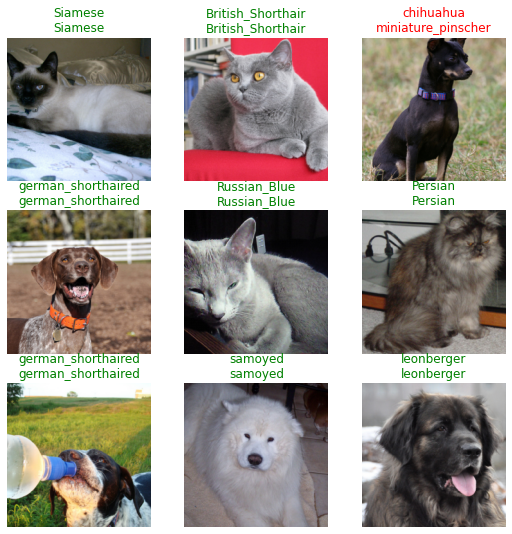

In [11]:
learn.show_results()

In [26]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

What breed is is the image? beagle


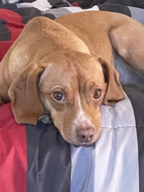

In [27]:
img = PILImage.create(uploader.data[0])
breed,_,probs = learn.predict(img)
print(f"What breed is is the image? {breed}")
img.to_thumb(192)

In [28]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

What breed is is the image? Bombay


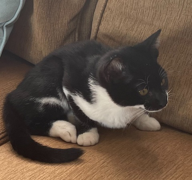

In [29]:
img = PILImage.create(uploader.data[0])
breed,_,probs = learn.predict(img)
print(f"What breed is is the image? {breed}")
img.to_thumb(192)

In [31]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

What breed is is the image? Egyptian_Mau


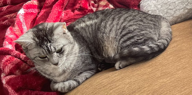

In [34]:
img = PILImage.create(uploader.data[0])
breed,a,b = learn.predict(img)
print(f"What breed is is the image? {breed}")
img.to_thumb(192)

In [37]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

out: ('beagle', tensor(15), tensor([1.8334e-02, 5.0952e-05, 3.9632e-06, 4.1681e-05, 1.4251e-04, 8.1804e-05,
        1.5988e-05, 1.7098e-05, 8.0074e-06, 4.5687e-04, 3.0767e-05, 4.5537e-05,
        1.2349e-02, 3.0366e-01, 3.4436e-03, 5.0476e-01, 8.9940e-04, 2.7260e-05,
        2.9252e-05, 2.4552e-04, 1.5397e-01, 2.9760e-05, 5.7980e-06, 4.9831e-05,
        8.2746e-06, 4.8208e-06, 7.8935e-04, 1.4728e-05, 1.4194e-05, 6.9689e-05,
        1.0556e-04, 1.7629e-06, 3.2090e-06, 4.0423e-07, 2.0263e-04, 5.6586e-06,
        8.1167e-05]))


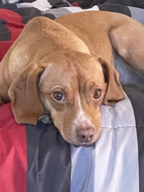

In [38]:
img = PILImage.create(uploader.data[0])
out = learn.predict(img)
print(f"out: {out}")
img.to_thumb(192)